In [ ]:
###STEP:1: SCRAPING OF REVIEWS FROM YOUTUBE USING SELENIUM AND CHROMEDRIVER

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from collections import OrderedDict
import time

# Step 1: Get inputs
video_url = input("Enter YouTube video URL: ")   #--------------------------Taking input of any youtube link from user
max_comments = int(input("Enter max number of comments to scrape: "))    #-----------------Since there are many comments user can set a limit to number of scrapes
chromedriver_path = "C:\\WebDriver\\chromedriver.exe"           # ------------------This path has been updated according to where Chromedriver is stored in my local disk


# Step 2: Setup Chrome
chrome_options = Options()                                         #----------------------This command allows us to visually see the simulation
# chrome_options.add_argument("--headless")                # Keep off for debugging   ------- Initially this command did not open the n=browser for us to see
chrome_options.add_argument("--disable-dev-shm-usage")         
chrome_options.add_argument("--no-sandbox")

service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)
wait = WebDriverWait(driver, 30)

# Step 3: Load video page
driver.get(video_url)

# Step 4: Wait for the comments section
try:
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "ytd-comments")))
    print("✅ Comments section detected.")                             # The code is tweaked to wait for comments to be seen and loaded and not move ahead if it 
except:                                                                # # has'nt popped up. No wait time restriction give here
    print("⚠️ Comments section not found.")
    driver.quit()

# Step 5: Start scrolling and collecting
youtube_reviews = []
collected_texts = set()
scroll_pause_time = 4

def scroll_page():
    driver.execute_script("window.scrollBy(0, 2000);")
    time.sleep(scroll_pause_time)

while len(youtube_reviews) < max_comments:
    scroll_page()
    
    # Find and clean comments
    comments = driver.find_elements(By.CSS_SELECTOR, "#content #content-text")
    for c in comments:
        comment_text = c.text.strip()
        if comment_text and comment_text not in collected_texts:
            youtube_reviews.append(comment_text)
            collected_texts.add(comment_text)

            if len(youtube_reviews) >= max_comments:
                break

    print(f"⏳ Scraped {len(youtube_reviews)} / {max_comments} comments...")

# Step 6: Clean up
driver.quit()
print(f"\n✅ Finished scraping {len(youtube_reviews)} comments!")


In [110]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from collections import OrderedDict
import time

# Step 1: Get inputs
video_url = input("Enter YouTube video URL: ")   #--------------------------Taking input of any youtube link from user
max_comments = int(input("Enter max number of comments to scrape: "))    #-----------------Since there are many comments user can set a limit to number of scrapes
chromedriver_path = "C:\\WebDriver\\chromedriver.exe"           # ------------------This path has been updated according to where Chromedriver is stored in my local disk


# Step 2: Setup Chrome
chrome_options = Options()                                         #----------------------This command allows us to visually see the simulation
# chrome_options.add_argument("--headless")                # Keep off for debugging   ------- Initially this command did not open the n=browser for us to see
chrome_options.add_argument("--disable-dev-shm-usage")         
chrome_options.add_argument("--no-sandbox")

service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)
wait = WebDriverWait(driver, 30)

# Step 3: Load video page
driver.get(video_url)

# Step 4: Wait for the comments section to fully load
try:
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "ytd-comments")))
    print("✅ Comments section detected.")

    # Wait additionally for the actual comment elements to load
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "#content #content-text")))
    print("🟢 First comment block loaded.")
except:
    print("⚠️ Comments section not found or failed to load.")
    driver.quit()

# Step 5: Start scrolling and collecting
youtube_reviews = []
collected_texts = set()
scroll_pause_time = 4

def scroll_page():
    driver.execute_script("window.scrollBy(0, 2000);")
    time.sleep(scroll_pause_time)

no_growth_count = 0
last_count = 0
max_wait_cycles = 10  # avoid infinite loop if loading is too slow

while len(youtube_reviews) < max_comments and no_growth_count < max_wait_cycles:
    scroll_page()

    # Re-check that comment elements are loaded
    comments = driver.find_elements(By.CSS_SELECTOR, "#content #content-text")
    found_any_new = False

    for c in comments:
        comment_text = c.text.strip()
        if comment_text and comment_text not in collected_texts:
            youtube_reviews.append(comment_text)
            collected_texts.add(comment_text)
            found_any_new = True

        if len(youtube_reviews) >= max_comments:
            break

    print(f"⏳ Scraped {len(youtube_reviews)} / {max_comments} comments...")

    # Stop if no new comments appeared
    if len(youtube_reviews) == last_count:
        no_growth_count += 1
        print("⚠️ No new comments loaded, waiting again...")
    else:
        no_growth_count = 0  # reset growth counter

    last_count = len(youtube_reviews)

# Step 6: Clean up
driver.quit()
print(f"\n✅ Finished scraping {len(youtube_reviews)} comments!")

Enter YouTube video URL:  https://www.youtube.com/watch?v=uYPbbksJxIg
Enter max number of comments to scrape:  100


✅ Comments section detected.
🟢 First comment block loaded.
⏳ Scraped 20 / 100 comments...
⏳ Scraped 40 / 100 comments...
⏳ Scraped 40 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 60 / 100 comments...
⏳ Scraped 60 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 80 / 100 comments...
⏳ Scraped 80 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 100 / 100 comments...

✅ Finished scraping 100 comments!


In [ ]:
#### STEP:2: WE WILL CHECK IF REVIEWS ARE SCRAPED  PROPERLY NOW

In [112]:
import pandas as pd

# Display scraped comments as a table
df_comments = pd.DataFrame(youtube_reviews[:max_comments], columns=["YouTube Comment"]) #----Put comments in a dataframe as a table and name it
df_comments.index += 1  # Start index from 1 instead of 0

# Show first 10 comments as a preview 
print("📝 Preview of scraped comments:")
display(df_comments.head(20))

# OR show the entire list (uncomment the next line if needed)
# display(df_comments) -----------------------------------------Excuting this would show all the reviews I choose to collect


📝 Preview of scraped comments:


,YouTube Comment
1,"""You're the man who gave them the power to des..."
2,"Oppenheimer, Einstein, Heisenberg, Bohr, and F..."
3,Murphy has been loyal to Nolan for nearly two ...
4,One thing about Nolan is that he certainly mak...
5,Cillian Murphy is literally the perfect cast f...
6,"I hope Cillian gets to deliver the iconic ""des..."
7,Cillian's eyes staring into space transfer so ...
8,16歳日本人です。2回視聴しましたが、まずはそのパワフルな表現や複雑に絡み合う人間のドラマに...
9,Cillian Murphy is giving me chills from the tr...
10,Cillian absolutely deserves to be the lead in ...


In [ ]:
#### STEP:3: CLEANING AND PRE-PROCESSING THE SCRAPED COMMENTS

In [114]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')                                 #JOINING ALL COMMENTS INTO ONE LONG STRING

# Join all comments into one large string
ip_rev_string = " ".join(youtube_reviews)
ip_rev_string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'"You\'re the man who gave them the power to destroy themselves... and the world is not prepared" - this wasn\'t just a dialogue, it was a Prophecy!!! Oppenheimer, Einstein, Heisenberg, Bohr, and Feynman. Some of greatest and most influential physicists of all time, in a summer blockbuster by Nolan! Murphy has been loyal to Nolan for nearly two decades. It\'s about time he was given his own film. This might just be the film that gets both these men their respective Oscars. No more than they deserve. Can\'t wait for this.\n\nOne of those rare moments where I called it correctly. I\'m so glad they won. Well deserved. Also, my boy RDJ got his Oscar, too. Icing on top of a delicious cake One thing about Nolan is that he certainly makes sure to have the top notch actors for his movie roles. Cillian Murphy is literally the perfect cast for this role. This is going to be epic! I hope Cillian gets to deliver the iconic "destroyer of worlds" speech: "We knew the world would not be the same. A f

In [116]:
# Clean text
ip_rev_string = re.sub("[^A-Za-z]+", " ", ip_rev_string).lower()       #REMOVING SPL CHARACTERS ,DIGITS,SPACES AND MAKING LOWERCASE.ip_rev_string
                                                                     #Consists of string of words from Youtube comments without stopwords removed

In [118]:
ip_revi_words = ip_rev_string.split()                   
print(ip_revi_words[:50])                                         #SPLITTING THE STRING INTO SENSIBLE induvidual WORDS USING ".spilt" from NLTK

['you', 're', 'the', 'man', 'who', 'gave', 'them', 'the', 'power', 'to', 'destroy', 'themselves', 'and', 'the', 'world', 'is', 'not', 'prepared', 'this', 'wasn', 't', 'just', 'a', 'dialogue', 'it', 'was', 'a', 'prophecy', 'oppenheimer', 'einstein', 'heisenberg', 'bohr', 'and', 'feynman', 'some', 'of', 'greatest', 'and', 'most', 'influential', 'physicists', 'of', 'all', 'time', 'in', 'a', 'summer', 'blockbuster', 'by', 'nolan']


In [134]:
# Load stopwords and extend slightly (generic, not product-specific)
stop_words = stopwords.words('english')
stop_words.extend(["youtube", "video", "product", "review", "subscribe","one", "channel","movie","trailer","cilian","cillian","imax","rdj","christopher","oppenheimer","cillian murphy","christopher nolan","nolan","murphy","robert downey junior","einstein","bohr","christian bale","heisenberg","adhd"])  #-------CAN ADD WORDS TO CUSTOM STOPWORDS 

# Remove stopwords
ip_reviews_words = [w for w in ip_revi_words if w not in stop_words and w != ""] #Conversion to a list of stopwords removed collection

# Preview
print("✅ Total cleaned words:", len(ip_reviews_words))
print("🧾 Sample cleaned words:", ip_reviews_words[:50]) #----------DISPLAYING A SAMPLE OF 50 CLEANED WORDS FROM THE REVIEW WORDS


✅ Total cleaned words: 1357
🧾 Sample cleaned words: ['man', 'gave', 'power', 'destroy', 'world', 'prepared', 'dialogue', 'prophecy', 'feynman', 'greatest', 'influential', 'physicists', 'time', 'summer', 'blockbuster', 'loyal', 'nearly', 'two', 'decades', 'time', 'given', 'film', 'might', 'film', 'gets', 'men', 'respective', 'oscars', 'deserve', 'wait', 'rare', 'moments', 'called', 'correctly', 'glad', 'well', 'deserved', 'also', 'boy', 'got', 'oscar', 'icing', 'top', 'delicious', 'cake', 'thing', 'certainly', 'makes', 'sure', 'top']


In [ ]:
#### CREATING A WORD CLOUD WITH THE TOKENISED CLEANED WORDS FROM OUR SCRAPED REVIEWS

In [136]:
ip_rev_string = " ".join(ip_reviews_words)            # REJOINING CLEANED WORDS INTO A SINGLE STRING TO MAKE A WORD CLOUD
ip_rev_string                                         #Redefining "ip_rev_string" to have a string of all COMPLETELY CLEANED WORDS"(stopwords removed)

'man gave power destroy world prepared dialogue prophecy feynman greatest influential physicists time summer blockbuster loyal nearly two decades time given film might film gets men respective oscars deserve wait rare moments called correctly glad well deserved also boy got oscar icing top delicious cake thing certainly makes sure top notch actors roles literally perfect cast role going epic hope gets deliver iconic destroyer worlds speech knew world would people laughed people cried people silent etc etc fantastic haunting speech day edit people feeling need say come quoting hindu scripture duh literally says quotes original audio eyes staring space transfer much meaning emotion unbelievable actor giving chills alone anyone seen peaky blinders really roles knows unbelievable chops absolutely deserves lead like long overdue radioactive detection sound gives chills subtle yet terrifying hats involved film oscars well deserved somebody builds bigger bomb love line seems given nonchalance

In [ ]:
#NOTE:

## THE FIRST CLEANING REMOVED ALL DIGITS,SPACES,SPL CHAR,MADE LOWERCASE AND WAS STILL A DOCUMENT WITH ONE LONG STRING
## THEN I SPLIT IT INTO WORDS--------LEADING TO "ip_revi_words"(contains stop words)
## THEN I DEFINED STOPWORDS AND REMOVED THEM TO FURTHER CLEAN IT-------LEADING TO "ip_reviews_words"(does not contain stopwords)

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


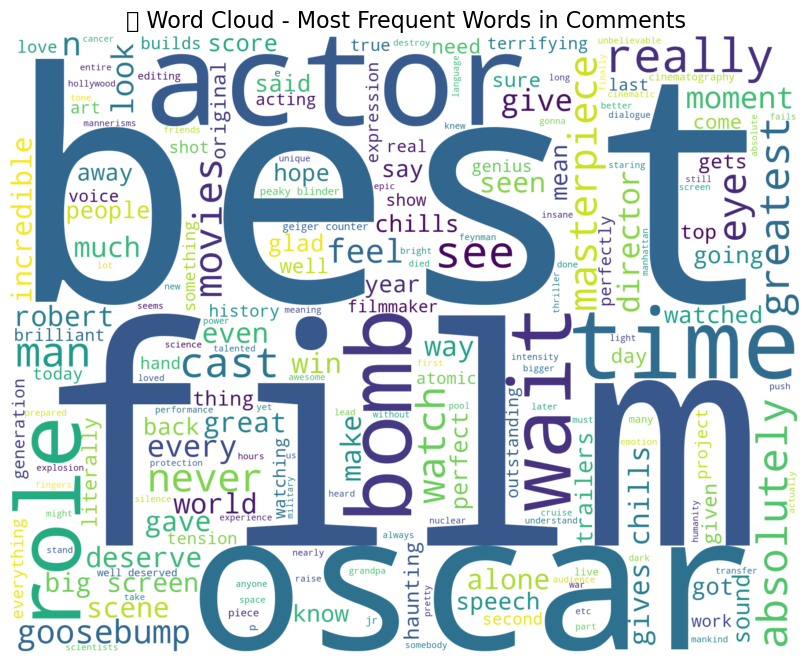

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(
    background_color='white',
    width=1800,                                   # WORDCLOUD GENERATION FOR CLEANED WORDS IN MY COMMENTS
    height=1400
).generate(ip_rev_string)                         #The ".generate" function demands a single document of words(string) seperated by " ".

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🌀 Word Cloud - Most Frequent Words in Comments", fontsize=16)
plt.show()


In [ ]:
#### USING 'TEXTBLOB' LIBRARY FOR SENTIMENT CLASSIFICATION OF CLEANED WORDS TO POSSITIVE AND NEGATIVE

In [140]:
!pip install textblob

In [142]:
from textblob import download_corpora
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

In [144]:
from textblob import TextBlob

def analyze_sentiments_in_string(text):              #--------Defining a function to judge sentiment of words(+,- or neutral) using textblob
    # Tokenize words using TextBlob
    words = TextBlob(text).words

    # Analyze polarity of each word
    sentiments = {word: TextBlob(word).sentiment.polarity for word in words}

    # Split into positive and negative
    positive_words = {word: sentiment for word, sentiment in sentiments.items() if sentiment > 0} # Classifying words with >0 score in here as +ive
    negative_words = {word: sentiment for word, sentiment in sentiments.items() if sentiment < 0} # Classifying words with <0 score in here as -ive

    return positive_words, negative_words

# Run it on your cleaned string
positive_words, negative_words = analyze_sentiments_in_string(ip_rev_string)  # Calling the function to act on our "Cleaned Words" which have a sentiment
                                                                              # score possibly attached to them
# Show results
print(f"✅ Found {len(positive_words)} positive words")
print(f"✅ Found {len(negative_words)} negative words")

# Preview few words
print("\nPositive Sample:", list(positive_words.items())[:10])
print("Negative Sample:", list(negative_words.items())[:10])


✅ Found 86 positive words
✅ Found 32 negative words

Positive Sample: [('greatest', 1.0), ('loyal', 0.3333333333333333), ('nearly', 0.1), ('rare', 0.3), ('glad', 0.5), ('top', 0.5), ('delicious', 1.0), ('certainly', 0.21428571428571427), ('sure', 0.5), ('perfect', 1.0)]
Negative Sample: [('destroy', -0.2), ('duh', -0.3), ('unbelievable', -0.25), ('long', -0.05), ('subtle', -0.3333333333333333), ('terrifying', -1.0), ('destructive', -0.6), ('bad', -0.6999999999999998), ('insane', -1.0), ('dark', -0.15)]


In [ ]:
#### POSITIVE AND NEGATIVE WORDS WORD-CLOUD-------PURELY BASED ON WORDS WHICH ALIGN WITH DICTIONARY AND NOT CONTEXT

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


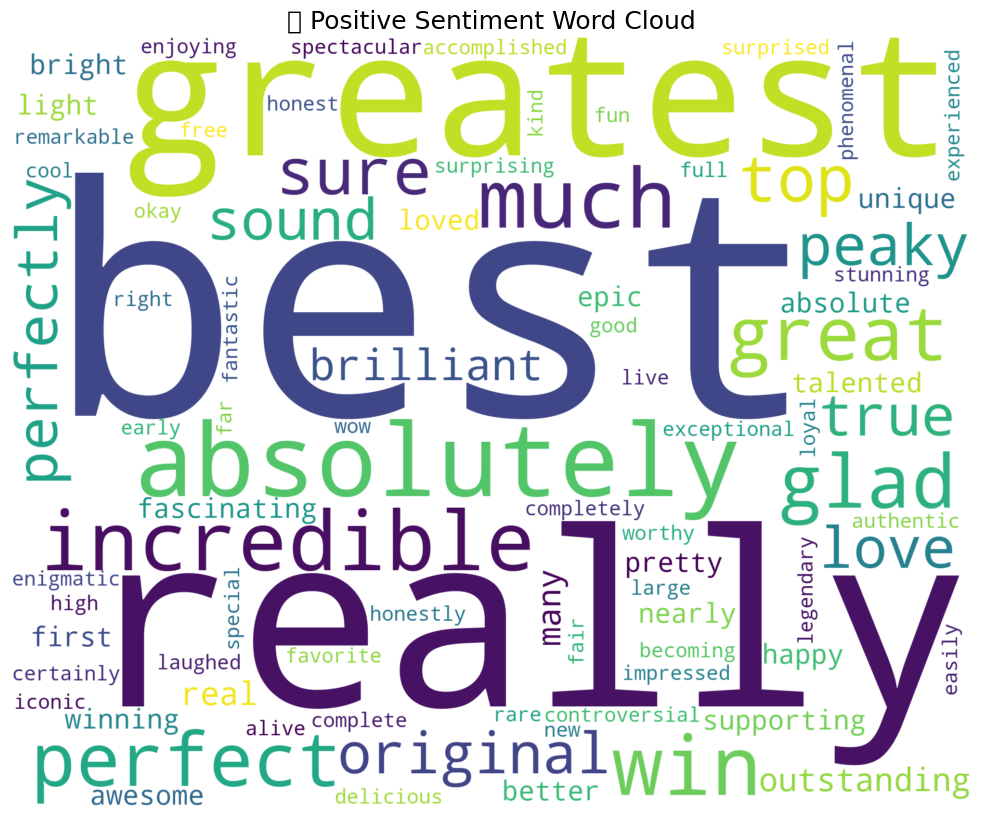

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


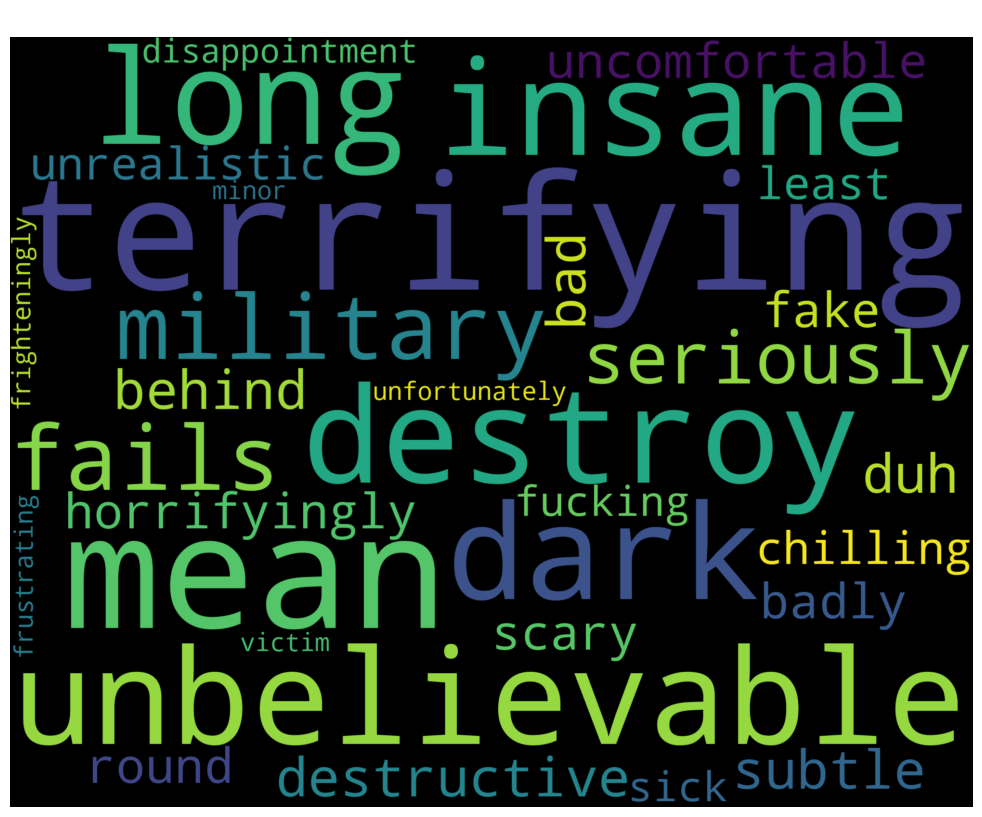

In [146]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Extract positive and negative words from cleaned list
ip_pos_in_pos = " ".join([w for w in ip_reviews_words if w in positive_words])
ip_neg_in_neg = " ".join([w for w in ip_reviews_words if w in negative_words])

# Step 2: Generate Positive Word Cloud
wordcloud_pos = WordCloud(
    background_color='white',
    width=2000,
    height=1600,
    max_words=500
).generate(ip_pos_in_pos)

# Step 3: Display Positive Word Cloud
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("💚 Positive Sentiment Word Cloud", fontsize=18)
plt.show()

# Step 4: Generate Negative Word Cloud
wordcloud_neg = WordCloud(
    background_color='black',
    width=2000,
    height=1600,
    max_words=500
).generate(ip_neg_in_neg)

# Step 5: Display Negative Word Cloud
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("💔 Negative Sentiment Word Cloud", fontsize=18, color='white')
plt.show()


In [ ]:
#### CREATION OF BI-GRAMS WITH CLEANED WORDS IN REVIEWS BUT STOPWORDS STILL KEPT

In [148]:
from nltk.util import ngrams

# Step 1: Remove empty or whitespace-only tokens
tokens_with_stopwords = [word for word in ip_revi_words if word.strip() != ""]

# Step 2: Generate bi-grams
bigrams_list = list(ngrams(tokens_with_stopwords, 2))

# Step 3: Convert tuple bi-grams to strings
bigram_phrases = [' '.join(pair) for pair in bigrams_list]

# Step 4: Display results
print(f"✅ Total bi-grams generated: {len(bigram_phrases)}")
print("\n📋 Sample bi-grams:")
for i, bigram in enumerate(bigram_phrases[:50]):
    print(f"{i+1}. {bigram}")



✅ Total bi-grams generated: 2932

📋 Sample bi-grams:
1. you re
2. re the
3. the man
4. man who
5. who gave
6. gave them
7. them the
8. the power
9. power to
10. to destroy
11. destroy themselves
12. themselves and
13. and the
14. the world
15. world is
16. is not
17. not prepared
18. prepared this
19. this wasn
20. wasn t
21. t just
22. just a
23. a dialogue
24. dialogue it
25. it was
26. was a
27. a prophecy
28. prophecy oppenheimer
29. oppenheimer einstein
30. einstein heisenberg
31. heisenberg bohr
32. bohr and
33. and feynman
34. feynman some
35. some of
36. of greatest
37. greatest and
38. and most
39. most influential
40. influential physicists
41. physicists of
42. of all
43. all time
44. time in
45. in a
46. a summer
47. summer blockbuster
48. blockbuster by
49. by nolan
50. nolan murphy


In [ ]:
#### BI-GRAMS WORD CLOUD TO SEE MOST REPEATING PHRASES------I ALREADY HAVE THE PHRASES---NEED TO JUST PROCESS THEM
#### HENCE I AM USING "COUNTER" INSTEAD OF COUNT VECTORISER"

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


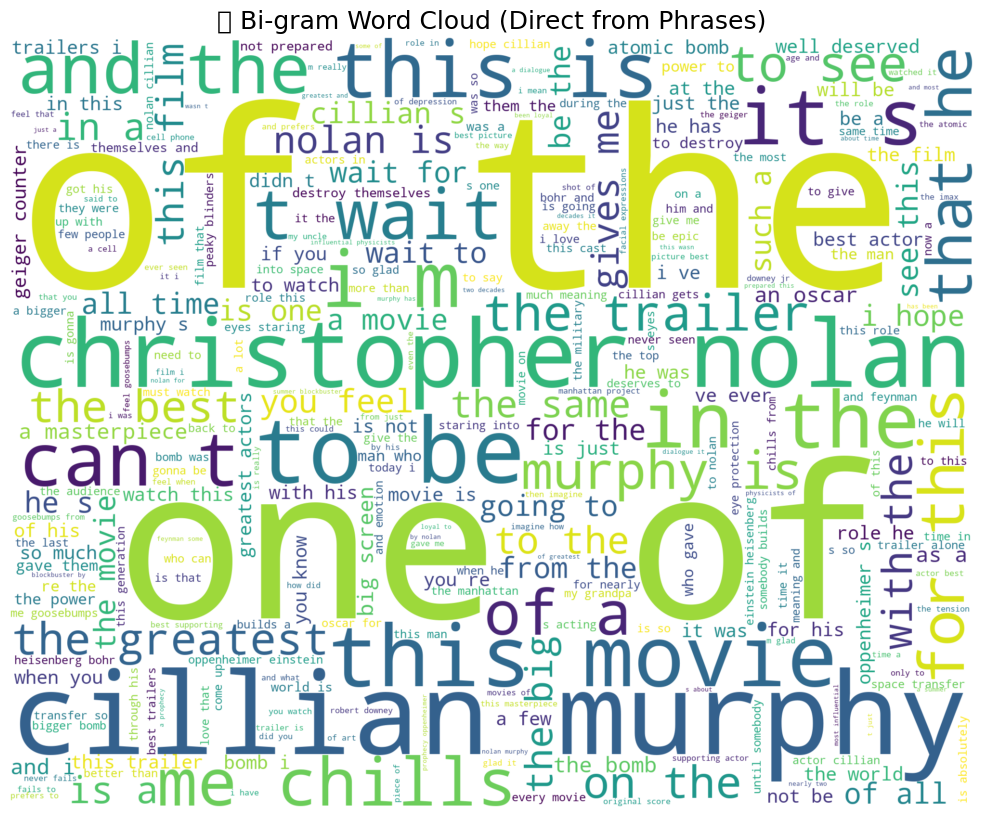

In [150]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Count bi-gram frequencies
bigram_counts = Counter(bigram_phrases)

# Step 2: Generate WordCloud from the Counter
bigram_wordcloud = WordCloud(
    width=2000,
    height=1600,
    background_color='white',
    max_words=300
).generate_from_frequencies(bigram_counts)

# Step 3: Display
plt.figure(figsize=(14, 10))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🔗 Bi-gram Word Cloud (Direct from Phrases)", fontsize=18)
plt.show()



In [ ]:
###LIST OF BI-GRAMS WHEN STOPWORDS ARE REMOVED

In [152]:
# Step 1: Remove empty or whitespace-only tokens
tokens_with_stopwords1 = [word for word in ip_reviews_words if word.strip() != ""]

# Step 2: Generate bi-grams
bigrams_list1 = list(ngrams(tokens_with_stopwords1, 2))

# Step 3: Convert tuple bi-grams to strings
bigram_phrases1 = [' '.join(pair) for pair in bigrams_list1]

# Step 4: Display results
print(f"✅ Total bi-grams generated: {len(bigram_phrases1)}")
print("\n📋 Sample bi-grams:")
for i, bigram2 in enumerate(bigram_phrases1[:50]):
    print(f"{i+1}. {bigram2}")


✅ Total bi-grams generated: 1356

📋 Sample bi-grams:
1. man gave
2. gave power
3. power destroy
4. destroy world
5. world prepared
6. prepared dialogue
7. dialogue prophecy
8. prophecy feynman
9. feynman greatest
10. greatest influential
11. influential physicists
12. physicists time
13. time summer
14. summer blockbuster
15. blockbuster loyal
16. loyal nearly
17. nearly two
18. two decades
19. decades time
20. time given
21. given film
22. film might
23. might film
24. film gets
25. gets men
26. men respective
27. respective oscars
28. oscars deserve
29. deserve wait
30. wait rare
31. rare moments
32. moments called
33. called correctly
34. correctly glad
35. glad well
36. well deserved
37. deserved also
38. also boy
39. boy got
40. got oscar
41. oscar icing
42. icing top
43. top delicious
44. delicious cake
45. cake thing
46. thing certainly
47. certainly makes
48. makes sure
49. sure top
50. top notch


C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


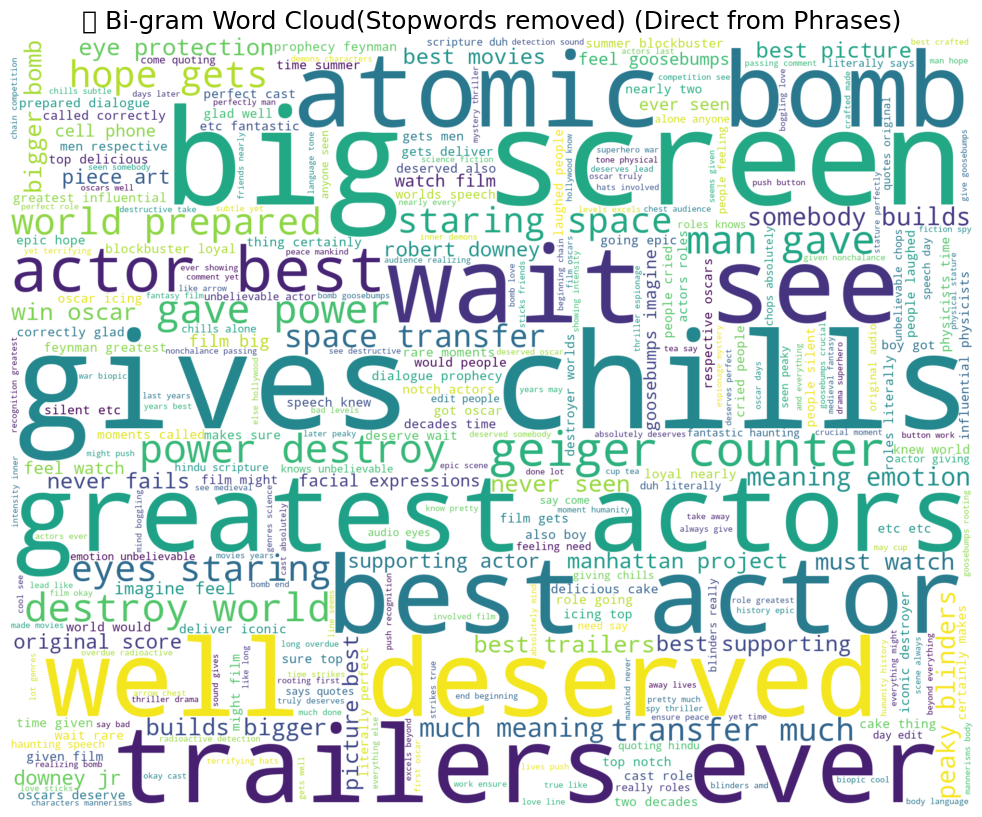

In [154]:
### WORDCLOUD OF BI-GRAMS WHEN STOPWORDS ARE REMOVED

# Step 1: Count bi-gram frequencies
bigram_counts1 = Counter(bigram_phrases1)

# Step 2: Generate WordCloud from the Counter
bigram_wordcloud1 = WordCloud(
    width=2000,
    height=1600,
    background_color='white',
    max_words=300
).generate_from_frequencies(bigram_counts1)

# Step 3: Display
plt.figure(figsize=(14, 10))
plt.imshow(bigram_wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title("🔗 Bi-gram Word Cloud(Stopwords removed) (Direct from Phrases)", fontsize=18)
plt.show()


In [ ]:
#####
#####
#####      SENTIMENT SUMMARY AND EMOTION DISTRIBUTION USING "NRC EMOTION LEXICON"
#####
#####

In [156]:
import pandas as pd

# Define the path to the downloaded lexicon file
nrc_lexicon_path = 'D:/Rishi/JINDAL Academics/Term 5 Subjects/Social Media Analytics/Final Project/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

# Load the lexicon into a DataFrame
nrc_df = pd.read_csv(nrc_lexicon_path, sep='\t', header=None, names=['word', 'emotion', 'association'])

# Filter out rows where association is 0
nrc_df = nrc_df[nrc_df['association'] == 1]

# Pivot the DataFrame to have words as index and emotions as columns
nrc_pivot = nrc_df.pivot(index='word', columns='emotion', values='association').fillna(0)

# Display the first few rows of the pivoted DataFrame
print(nrc_pivot.head())


emotion      anger  anticipation  disgust  fear  joy  negative  positive  \
word                                                                       
abacus         0.0           0.0      0.0   0.0  0.0       0.0       0.0   
abandon        0.0           0.0      0.0   1.0  0.0       1.0       0.0   
abandoned      1.0           0.0      0.0   1.0  0.0       1.0       0.0   
abandonment    1.0           0.0      0.0   1.0  0.0       1.0       0.0   
abba           0.0           0.0      0.0   0.0  0.0       0.0       1.0   

emotion      sadness  surprise  trust  
word                                   
abacus           0.0       0.0    1.0  
abandon          1.0       0.0    0.0  
abandoned        1.0       0.0    0.0  
abandonment      1.0       1.0    0.0  
abba             0.0       0.0    0.0  


In [ ]:
ip_reviews_words  # These are the words cleaned completelely(Even stopwords removed)

In [ ]:
### WE will now try to associate these words from Youtube comments with NRC Emotion Lexicon

In [158]:
from collections import Counter

def analyze_emotions(comments, nrc_pivot):
    # Initialize a counter for emotions
    emotion_counter = Counter()

    # Iterate over each word in the comments
    for word in comments:
        if word in nrc_pivot.index:
            # Add the emotions associated with the word
            emotion_counter.update(nrc_pivot.loc[word][nrc_pivot.loc[word] > 0].index)

    return emotion_counter

# Assuming 'ip_reviews_words' is your list of cleaned words from YouTube comments
emotion_counts = analyze_emotions(ip_reviews_words, nrc_pivot)

# Display the emotion counts
print(emotion_counts)

Counter({'positive': 142, 'anticipation': 91, 'trust': 78, 'negative': 75, 'joy': 72, 'surprise': 52, 'fear': 50, 'sadness': 43, 'anger': 40, 'disgust': 16})


In [ ]:
##Above output denotes number of words in our corpus which are associated with "Emotions"-----We get overall emotion distribution
## in our corpus

# Visualize the Emotion Distribution

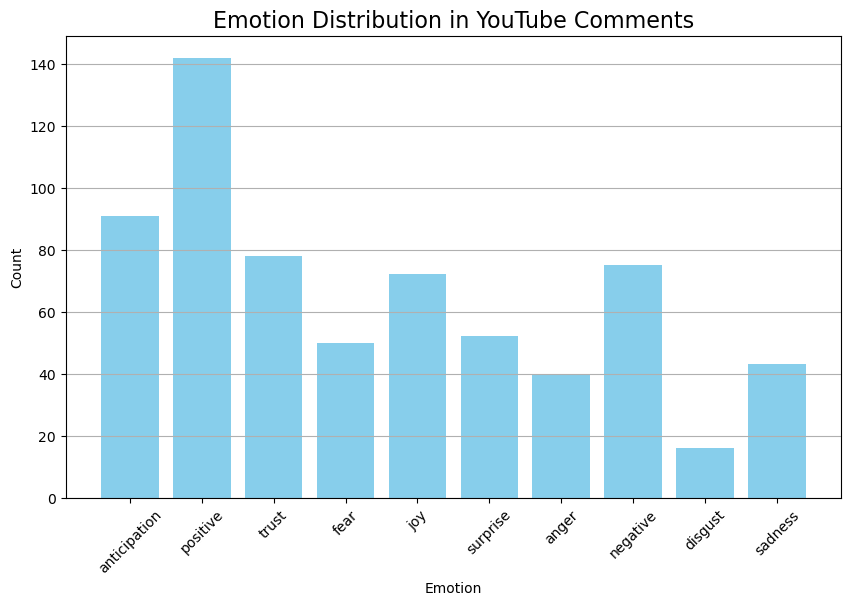

In [160]:
# Plot the emotion distribution
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.title("Emotion Distribution in YouTube Comments", fontsize=16)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
### Performing Different Activities like Senti Analysis(as a whole), Topic Modelling, Text Summarisation, Keyword extraction
### Named Entity Recognition

In [162]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy


In [164]:

def analyze_sentiment(text):
    return TextBlob(text).sentiment

def topic_modeling(docs, num_topics=5):
    vectorizer = CountVectorizer(stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(docs)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
    lda.fit(doc_term_matrix)
    return lda, vectorizer.get_feature_names_out()

def extract_keywords(docs, num_keywords=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(docs)
    feature_array = vectorizer.get_feature_names_out()
    
    # Compute average TF-IDF score across all documents
    tfidf_scores = tfidf_matrix.mean(axis=0).A1  # .A1 flattens the sparse matrix
    sorted_indices = tfidf_scores.argsort()[::-1]
    
    # Get top N keywords
    top_keywords = feature_array[sorted_indices][:num_keywords]
    return top_keywords

def named_entity_recognition(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)


In [166]:
##Topic Modelling

# Run topic modeling on the raw comment list
lda_model, feature_names = topic_modeling(youtube_reviews, num_topics=5)

# Display the top 10 words per topic
print("🧠 Topics discovered:")
for idx, topic in enumerate(lda_model.components_):
    print(f"\n🔹 Topic {idx+1}:")
    top_words_indices = topic.argsort()[:-11:-1]  # Top 10 words
    top_words = [feature_names[i] for i in top_words_indices]
    print(", ".join(top_words))


🧠 Topics discovered:

🔹 Topic 1:
best, movie, film, movies, nolan, chills, wait, time, screen, big

🔹 Topic 2:
cillian, movie, oppenheimer, actor, eyes, really, best, looks, voice, generation

🔹 Topic 3:
movie, nolan, man, cast, just, oppenheimer, going, away, work, absolutely

🔹 Topic 4:
cillian, murphy, nolan, trailer, christopher, just, film, goosebumps, absolutely, feel

🔹 Topic 5:
movie, really, time, oppenheimer, murphy, cillian, bomb, like, trailers, trailer


In [ ]:
###TD-IDF---TF-IDF stands for Term Frequency–Inverse Document Frequency.
### It helps you find: 1) Important words in a document , 2) Based on how frequently they appear in one doc, 3)And how rare they are across all docs

In [168]:
# Extract top N keywords from all YouTube comments
top_keywords = extract_keywords(youtube_reviews, num_keywords=10)

# Display result
print("🔑 Top Keywords (TF-IDF Based):")
for i, kw in enumerate(top_keywords, 1):
    print(f"{i}. {kw}")


🔑 Top Keywords (TF-IDF Based):
1. movie
2. cillian
3. nolan
4. murphy
5. best
6. film
7. christopher
8. trailer
9. chills
10. oppenheimer


In [ ]:
### Named Entity Recognition:(NER)-------
#It extracts real-world objects from text---Helps Identify Real life Person, Organisation and Products being discussed in comments.

In [170]:
youtube_reviews_string = " ".join(youtube_reviews)

In [172]:
nlp = spacy.load("en_core_web_sm")  # Load spaCy's small English model

In [174]:
# Run Named Entity Recognition
entities = named_entity_recognition(youtube_reviews_string)

# Display all recognized entities grouped by type
from collections import defaultdict
entity_dict = defaultdict(list)

for text, label in entities:
    entity_dict[label].append(text)

# Print sample results
print("🧠 Named Entities Found:\n")
for label, values in entity_dict.items():
    print(f"{label} ({len(values)}):")
    print(", ".join(set(values[:10])))  # show up to 10 unique entities
    print("-----")


🧠 Named Entities Found:

ORG (40):
Oppenheimer, Einstein, Oppenheimer, RDJ, Feynman, Espionage, Mystery, Nolan
-----
GPE (14):
Heisenberg, Einstein, Masterpiece, Bohr, Manhattan, US, Hollywood
-----
DATE (18):
summer, this year, One year ago, 28 days later, this day, 10 millionth time, nearly two decades, the decade, the last 20 years, years
-----
PERSON (67):
Blinders, Oscar, Christopher Nolan, Cillian Murphy, christopher nolan, Murphy
-----
CARDINAL (19):
one, 16歳日本人です。2回視聴しましたが、まずはそのパワフルな表現や複雑に絡み合う人間のドラマに圧倒され心を惹かれました。音や俳優さんたちの演技も素晴らしく、映画館で見て本当に良かったと思いました。日本国内では日本についての言及が少ないなどと賛否両論あります。しかし、被爆国の立場でしか原爆を見ていなかった私にとって(多くの日本人もそうでしょう)は、発明者の葛藤や苦悩はもちろん、原爆を落としたアメリカ側から物事を見る点においても非常に興味深く、私に新しい視点をくれたと感じました。素晴らしい映画をありがとうございます, 7, 2:07, One
-----
NORP (15):
Hindu, Cillian
-----
ORDINAL (3):
second, first
-----
WORK_OF_ART (6):
Best Picture, Oscar, Best Supporting Actor
Best Original Score 
Best Cinematography, Best Actor, Thriller, Supporting Actor
-----
EVENT (1):
War
-----
TIME (8):
1230am, 4 ho

In [ ]:
### I Dont find the results of NER to be very ideal and sensible